In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt

In [2]:
from bets import get_equipes, afficher_note_match, calcul_somme
from dataload import get_zeros_and_ones
from model import obtenir_arrays, obtenir_note, note_match_beta, get_notes
from helper_functions import days_between, print_array_notes, print_array_equipes
from research import get_data, get_plots

DATA

In [3]:
dataframe = pd.read_csv('../data/Pays-Bas/Eredevisie/N1 10:11.csv')

i = 10
while (i < 23):
  d2 = pd.read_csv(f"../data/Pays-Bas/Eredevisie/N1 {i}:{i + 1}.csv")
  dataframe = pd.concat([dataframe, d2])
  i += 1

dataframe = dataframe.iloc[:, 1:6]
dataframe['A&H Scored?'] = ''
dataframe = dataframe.reset_index(drop=True)
dataframe = get_zeros_and_ones(dataframe, 'FTHG', 'FTAG')

print(f"{dataframe.tail(20).to_string()}\n")

            Date         HomeTeam          AwayTeam  FTHG  FTAG A&H Scored?
4067  26/01/2023             Ajax          Volendam   1.0   1.0           1
4068  28/01/2023    PSV Eindhoven   Go Ahead Eagles   2.0   0.0        None
4069  28/01/2023         Waalwijk          FC Emmen   2.0   0.0        None
4070  28/01/2023       Heerenveen           Vitesse   1.0   3.0           1
4071  28/01/2023         Nijmegen  Sparta Rotterdam   1.0   1.0           1
4072  28/01/2023       AZ Alkmaar           Utrecht   5.0   5.0           1
4073  29/01/2023           Twente         Feyenoord   1.0   1.0           1
4074  29/01/2023        Excelsior              Ajax   1.0   4.0           1
4075  29/01/2023         Volendam         Groningen   3.0   2.0           1
4076  29/01/2023          Cambuur       For Sittard   1.0   2.0           1
4077  01/02/2023         Waalwijk   Go Ahead Eagles   3.0   1.0           1
4078  03/02/2023      For Sittard  Sparta Rotterdam   0.0   0.0        None
4079  04/02/

MODÈLE

In [4]:
dataframe['Note Match Beta'] = ''

dataframe = get_notes(dataframe, 'HomeTeam', 'AwayTeam', 'Date', 'Note Match Beta', 1)

0 - 0.0
1 - 0.0
2 - 0.04198057499844161
3 - 0.0
4 - 0.0
5 - 0.04198057499844161
6 - 0.04198057499844161
7 - 0.04198057499844161
8 - 0.04198057499844161
9 - 0.08396114999688321
10 - 0.08396114999688321
11 - 0.018869615714790688
12 - 0.018869615714790688
13 - 0.0
14 - 0.06297086249766241
15 - 0.06297086249766241
16 - 0.08396114999688321
17 - 0.04198057499844161
18 - 0.09244383713460369
19 - 0.06297086249766241
20 - 0.09032316535017357
21 - 0.11555479641825461
22 - 0.04198057499844161
23 - 0.09032316535017357
24 - 0.11131345284939437
25 - 0.06085019071323229
26 - 0.09032316535017357
27 - 0.0839611499968832
28 - 0.08184047821245309
29 - 0.1259417249953248
30 - 0.08396114999688321
31 - 0.1554146996322661
32 - 0.16177671498555646
33 - 0.104951437496104
34 - 0.06085019071323229
35 - 0.04198057499844161
36 - 0.06085019071323229
37 - 0.19549103319135797
38 - 0.17025940212327692
39 - 0.17025940212327692
40 - 0.19337036140692784
41 - 0.06721220606652265
42 - 0.17238007390770704
43 - 0.11131345284

In [5]:
print(f"{dataframe.tail(20).to_string()}\n")

            Date         HomeTeam          AwayTeam  FTHG  FTAG A&H Scored? Note Match Beta
4067  26/01/2023             Ajax          Volendam   1.0   1.0           1        0.475286
4068  28/01/2023    PSV Eindhoven   Go Ahead Eagles   2.0   0.0        None        0.382436
4069  28/01/2023         Waalwijk          FC Emmen   2.0   0.0        None         0.36628
4070  28/01/2023       Heerenveen           Vitesse   1.0   3.0           1        0.447166
4071  28/01/2023         Nijmegen  Sparta Rotterdam   1.0   1.0           1        0.390552
4072  28/01/2023       AZ Alkmaar           Utrecht   5.0   5.0           1        0.627309
4073  29/01/2023           Twente         Feyenoord   1.0   1.0           1        0.397866
4074  29/01/2023        Excelsior              Ajax   1.0   4.0           1        0.541591
4075  29/01/2023         Volendam         Groningen   3.0   2.0           1        0.409547
4076  29/01/2023          Cambuur       For Sittard   1.0   2.0           1     

In [6]:
""" dtcsv = dataframe.to_csv(index=None)
print(dtcsv) """

' dtcsv = dataframe.to_csv(index=None)\nprint(dtcsv) '

RECHERCHE

In [7]:
lenMatchGroups = 29
data = get_data(dataframe, 'Date', lenMatchGroups, 55, 65, 1.4, 0.5, 42, 43, 1)

Note : 0.55
42% à chaque pari
[1, 1, 1, 1, 1, 1, None, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, None, 1, 1, 1, 1, 1, None, 1, 1, 1]
Sous-résultat : 26/29, 89.65% de réussite
[1, None, 1, 1, 1, 1, None, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, None, 1, 1, 1, 1, 1, 1, 1]
Sous-résultat : 26/29, 89.65% de réussite
[1, 1, 1, 1, None, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, None, 1, None, 1, None, 1, 1, 1, 1, 1, None, 1, 1]
Sous-résultat : 24/29, 82.75% de réussite
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Sous-résultat : 29/29, 100.0% de réussite
[1, 1, 1, 1, None, 1, 1, 1, 1, 1, 1, 1, 1, None, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, None, 1, 1, 1]
Sous-résultat : 26/29, 89.65% de réussite
[1, 1, 1, 1, 1, 1, 1, 1, None, 1, 1, 1, 1, 1, 1, 1, 1, 1, None, 1, None, 1, 1, 1, 1, None, 1, 1, 1]
Sous-résultat : 25/29, 86.2% de réussite
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Sous-résultat : 29/29, 100.0% de réussite
[1, 1, 

20
Note : 0.55


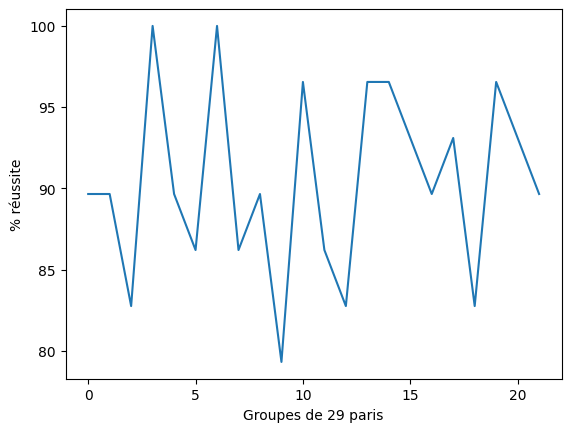

Note : 0.555


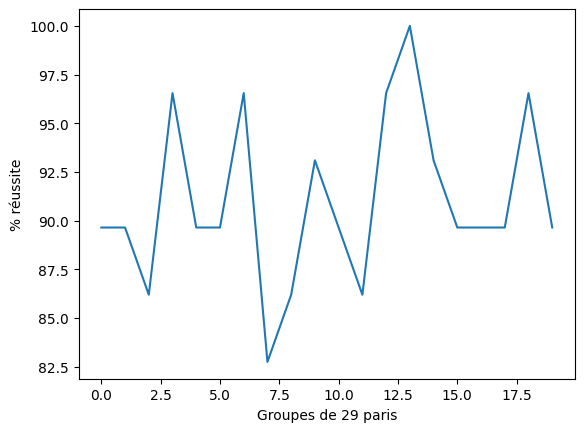

Note : 0.56


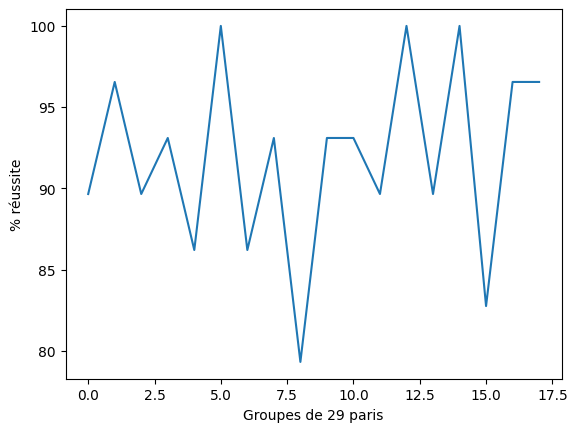

Note : 0.565


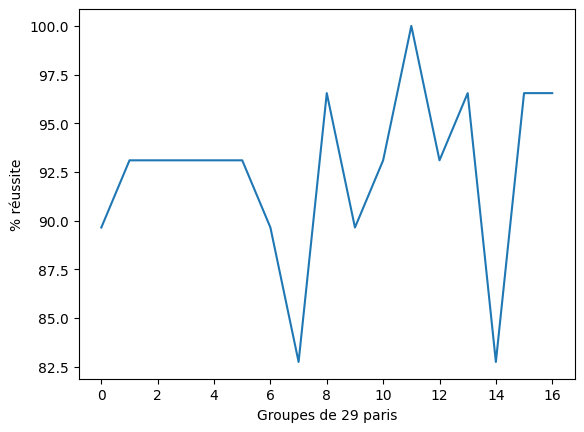

Note : 0.57


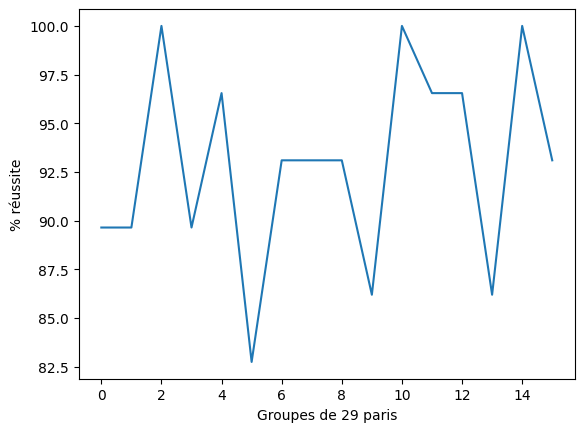

Note : 0.575


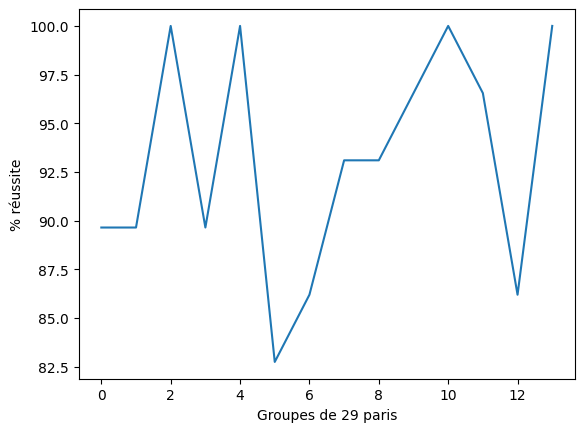

Note : 0.58


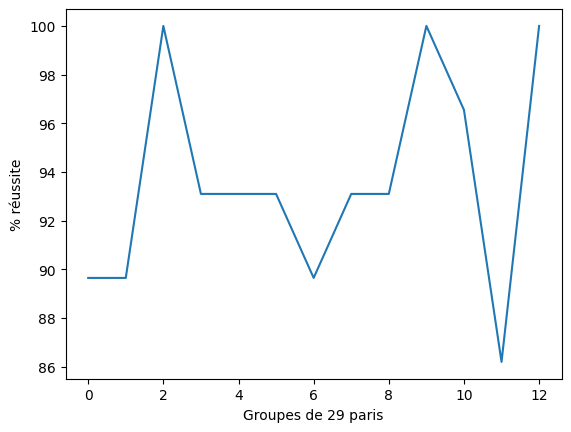

Note : 0.585


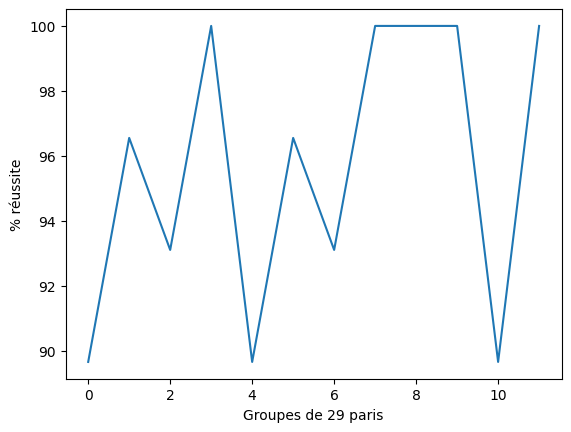

Note : 0.59


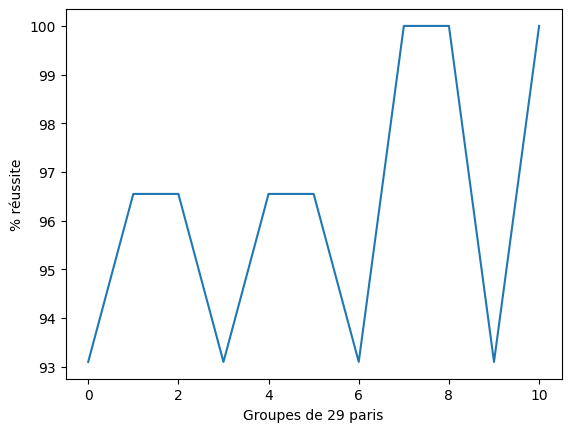

Note : 0.595


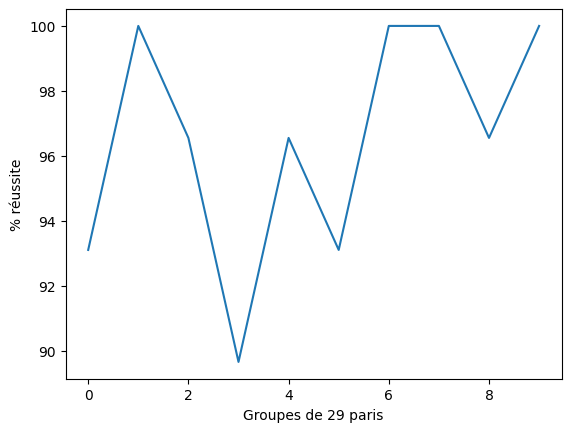

Note : 0.6


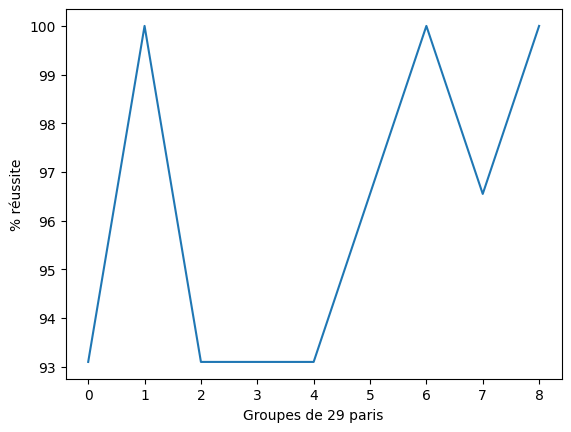

Note : 0.605


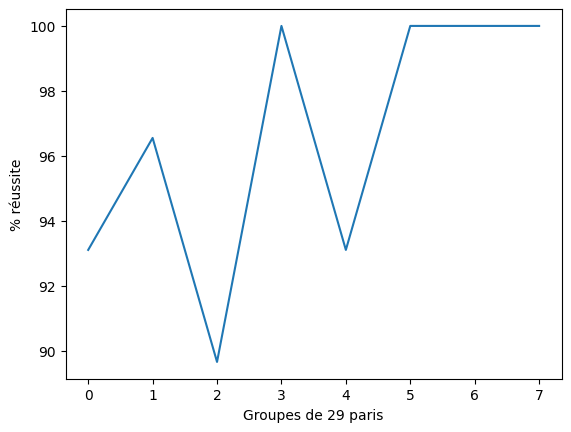

Note : 0.61


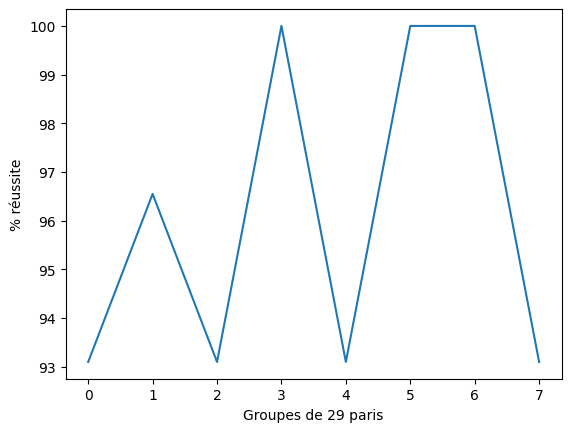

Note : 0.615


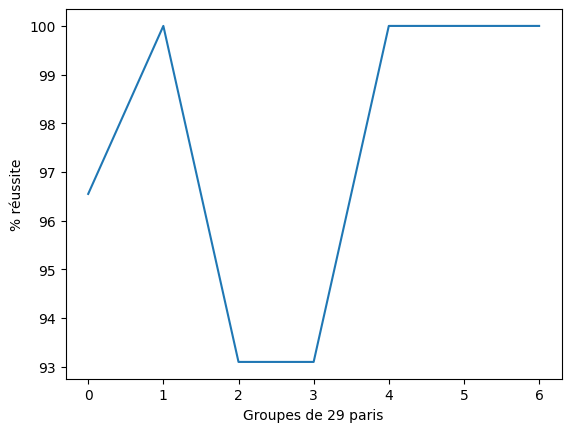

Note : 0.62


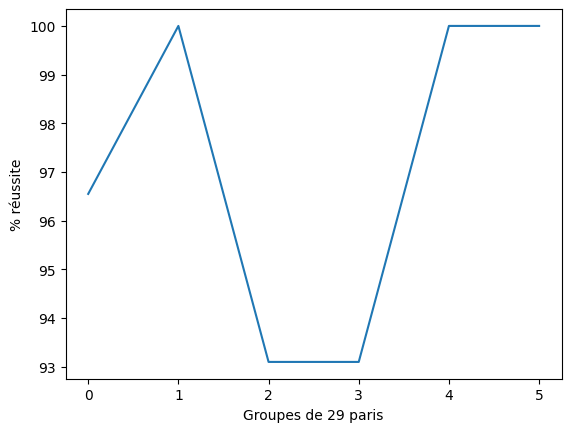

Note : 0.625


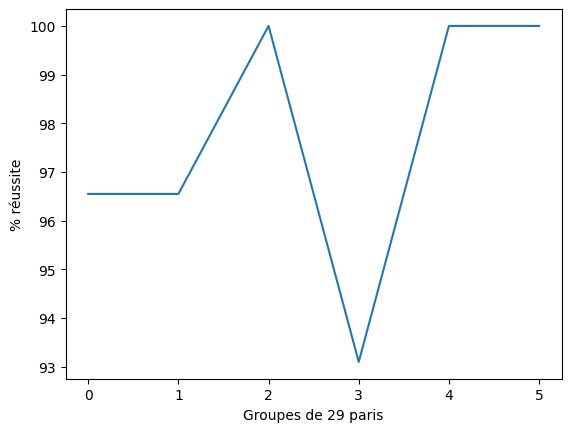

Note : 0.63


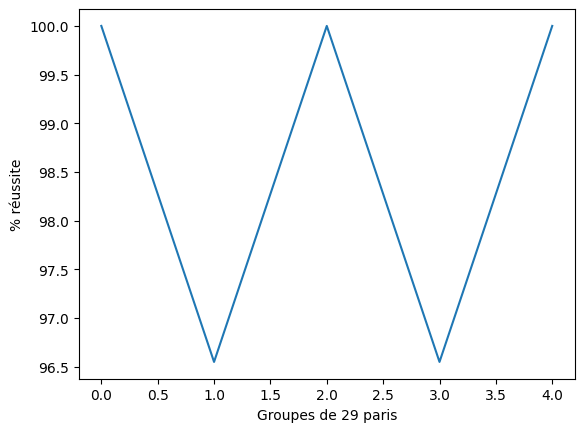

Note : 0.635


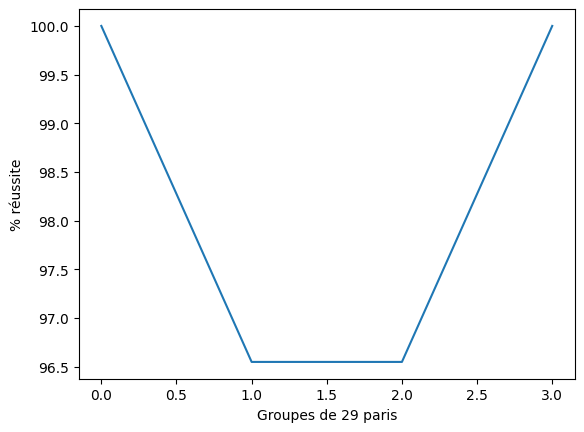

Note : 0.64


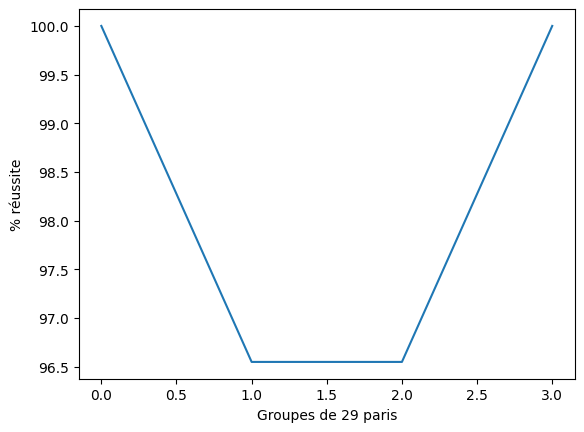

Note : 0.645


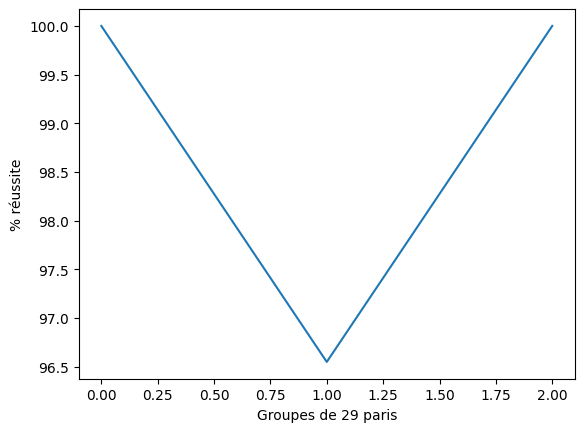

In [8]:
print(len(data))
get_plots(data, lenMatchGroups)

PARIS

In [9]:
arrayEquipes = get_equipes(dataframe, 0, 18, 'HomeTeam', 'AwayTeam')

print_array_equipes(arrayEquipes)

0 - Groningen
1 - Twente
2 - Go Ahead Eagles
3 - Nijmegen
4 - Feyenoord
5 - PSV Eindhoven
6 - Cambuur
7 - Ajax
8 - Excelsior
9 - Waalwijk
10 - Utrecht
11 - Heerenveen
12 - FC Emmen
13 - Vitesse
14 - Volendam
15 - AZ Alkmaar
16 - For Sittard
17 - Sparta Rotterdam


In [10]:
afficher_note_match(dataframe, arrayEquipes[15], arrayEquipes[8], 0, 'HomeTeam', 'AwayTeam', 'Date')

Match : AZ Alkmaar - Excelsior
Note : 0.5629052255143567



['AZ Alkmaar', 'Excelsior', 0.5629052255143567]

In [11]:
""" notes = notes_equipes_futur(dataframe, arrayEquipes, 'HomeTeam', 'AwayTeam', 'Date')

print_array_notes(notes) """

" notes = notes_equipes_futur(dataframe, arrayEquipes, 'HomeTeam', 'AwayTeam', 'Date')\n\nprint_array_notes(notes) "

In [12]:
""" note_match(notes[15], notes[8])
note_match(notes[3], notes[6])
note_match(notes[5], notes[0])
note_match(notes[12], notes[16])
note_match(notes[17], notes[2])
note_match(notes[13], notes[10])
note_match(notes[11], notes[4])
note_match(notes[1], notes[14])
note_match(notes[7], notes[9]) """

' note_match(notes[15], notes[8])\nnote_match(notes[3], notes[6])\nnote_match(notes[5], notes[0])\nnote_match(notes[12], notes[16])\nnote_match(notes[17], notes[2])\nnote_match(notes[13], notes[10])\nnote_match(notes[11], notes[4])\nnote_match(notes[1], notes[14])\nnote_match(notes[7], notes[9]) '

In [13]:
#print(calcul_somme(200, 0.42))